# Setup and Data

In [ ]:
from inflation_analysis import calculate_price_indexes, output_data, output_obs_table, price_index_over_time, top_abs_weight_differences, top_price_index_contributors, grouping

In [2]:
# Parameters
start_year = 2019
end_year = 2022
top_n = 5
comparison_level = 'primary'
data_folder="/Users/roykisluk/Downloads/Consumer_Expenditure_Survey/"
base_year = start_year
comparison_year = end_year

In [ ]:
nationality, observance, income, ses, age, total_misparmb = grouping(start_year, end_year)

In [4]:
# Prepare data: calculate price indexes for each group, {comparison_level} and primary categories, and total
nationality_analysis, nationality_mmb = output_data(nationality, start_year, end_year, base_year, data_folder)
observance_analysis, observance_mmb = output_data(observance, start_year, end_year, base_year, data_folder)
income_analysis, income_mmb = output_data(income, start_year, end_year, base_year, data_folder)
ses_analysis, ses_mmb = output_data(ses, start_year, end_year, base_year, data_folder)
age_analysis, age_mmb = output_data(age, start_year, end_year, base_year, data_folder)

# General population
gen_pop_df, gen_pop_secondary_df, gen_pop_primary_df, gen_pop_yearly_price_index = calculate_price_indexes(start_year, end_year, base_year, cex_data_folder=data_folder)
gen_pop = {
    'combined_secondary_df': gen_pop_secondary_df,
    'combined_primary_df': gen_pop_primary_df,
    'yearly_price_index': gen_pop_yearly_price_index
}

Processing group 1/2 (Arab)
Processing group 2/2 (Jewish)
Processing group 1/5 (Secular)
Processing group 2/5 (Conservative)
Processing group 3/5 (Religious)
Processing group 4/5 (Haredi)
Processing group 5/5 (Mixed)
Processing group 1/5 (1)
Processing group 2/5 (2)
Processing group 3/5 (3)
Processing group 4/5 (4)
Processing group 5/5 (5)
Processing group 1/3 (1)
Processing group 2/3 (2)
Processing group 3/3 (3)
Processing group 1/3 (Young)
Processing group 2/3 (Middle)
Processing group 3/3 (Old)


# Output

## Tables

In [5]:
# Observations tables
output_obs_table(start_year, end_year, nationality_mmb)

,2019,2020,2021,2022
Arab,1103 (14.12%),513 (9.27%),951 (15.79%),727 (13.31%)
Jewish,6393 (81.85%),4920 (88.94%),4911 (81.52%),4584 (83.91%)
Total,7811 (100.0%),5532 (100.0%),6024 (100.0%),5463 (100.0%)


In [6]:
output_obs_table(start_year, end_year, observance_mmb)

,2019,2020,2021,2022
Secular,3668 (46.96%),2750 (49.71%),2690 (44.65%),2294 (41.99%)
Conservative,2117 (27.1%),1460 (26.39%),1577 (26.18%),1602 (29.32%)
Religious,1218 (15.59%),809 (14.62%),1035 (17.18%),808 (14.79%)
Haredi,565 (7.23%),440 (7.95%),551 (9.15%),595 (10.89%)
Mixed,218 (2.79%),99 (1.79%),168 (2.79%),145 (2.65%)
Total,7811 (100.0%),5532 (100.0%),6024 (100.0%),5463 (100.0%)


In [7]:
output_obs_table(start_year, end_year, income_mmb)

,2019,2020,2021,2022
1,1356 (17.36%),871 (15.74%),1020 (16.93%),1052 (19.26%)
2,1467 (18.78%),978 (17.68%),1111 (18.44%),1116 (20.43%)
3,1524 (19.51%),1087 (19.65%),1197 (19.87%),1061 (19.42%)
4,1632 (20.89%),1225 (22.14%),1250 (20.75%),1087 (19.9%)
5,1848 (23.66%),1432 (25.89%),1479 (24.55%),1162 (21.27%)
Total,7811 (100.0%),5532 (100.0%),6024 (100.0%),5463 (100.0%)


In [8]:
output_obs_table(start_year, end_year, income_mmb)

,2019,2020,2021,2022
1,1356 (17.36%),871 (15.74%),1020 (16.93%),1052 (19.26%)
2,1467 (18.78%),978 (17.68%),1111 (18.44%),1116 (20.43%)
3,1524 (19.51%),1087 (19.65%),1197 (19.87%),1061 (19.42%)
4,1632 (20.89%),1225 (22.14%),1250 (20.75%),1087 (19.9%)
5,1848 (23.66%),1432 (25.89%),1479 (24.55%),1162 (21.27%)
Total,7811 (100.0%),5532 (100.0%),6024 (100.0%),5463 (100.0%)


In [9]:
output_obs_table(start_year, end_year, ses_mmb)

,2019,2020,2021,2022
1,2163 (27.69%),1371 (24.78%),2008 (33.33%),1964 (35.95%)
2,1911 (24.47%),1490 (26.93%),1503 (24.95%),1352 (24.75%)
3,3753 (48.05%),2719 (49.15%),2546 (42.26%),2162 (39.58%)
Total,7811 (100.0%),5532 (100.0%),6024 (100.0%),5463 (100.0%)


## Plots

### Yearly Price Index Comparison Between Groups

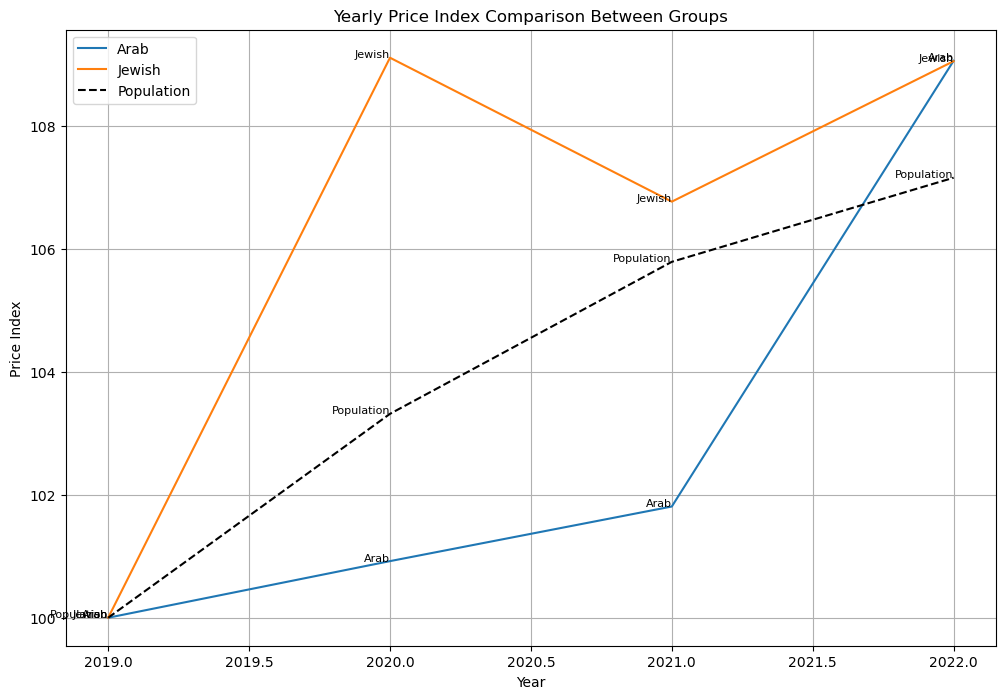

In [10]:
price_index_over_time(nationality_analysis, gen_pop_yearly_price_index)

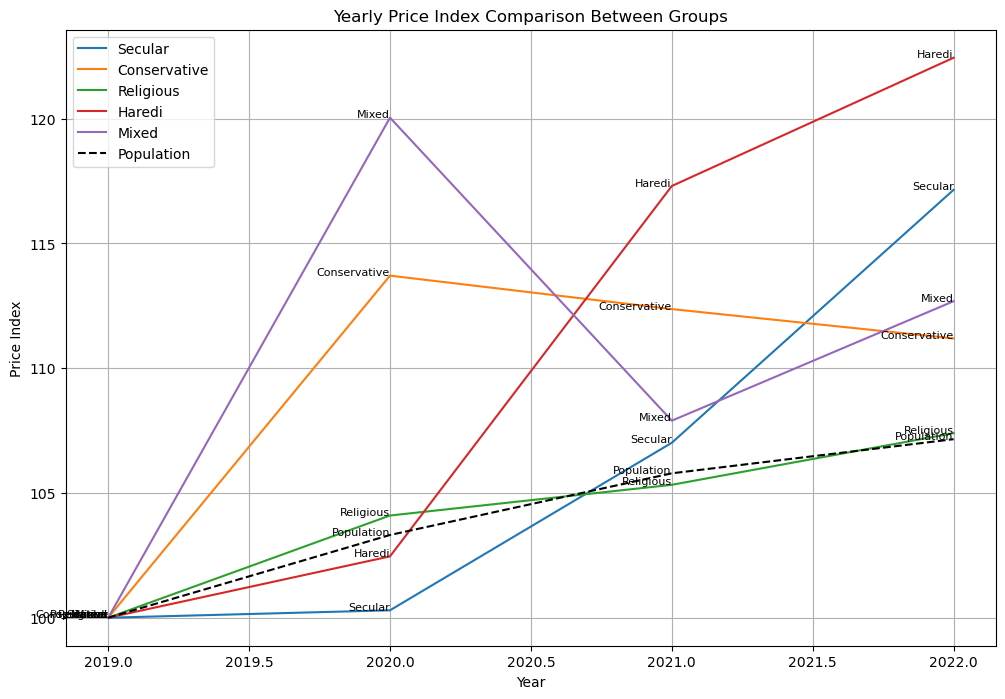

In [11]:
price_index_over_time(observance_analysis, gen_pop_yearly_price_index)

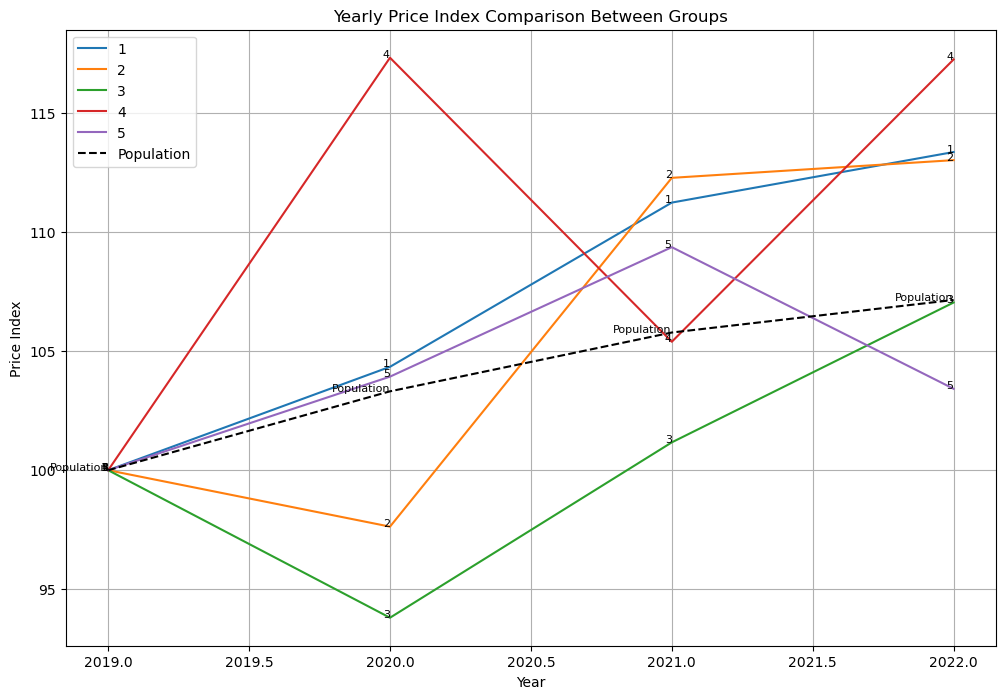

In [12]:
price_index_over_time(income_analysis, gen_pop_yearly_price_index)

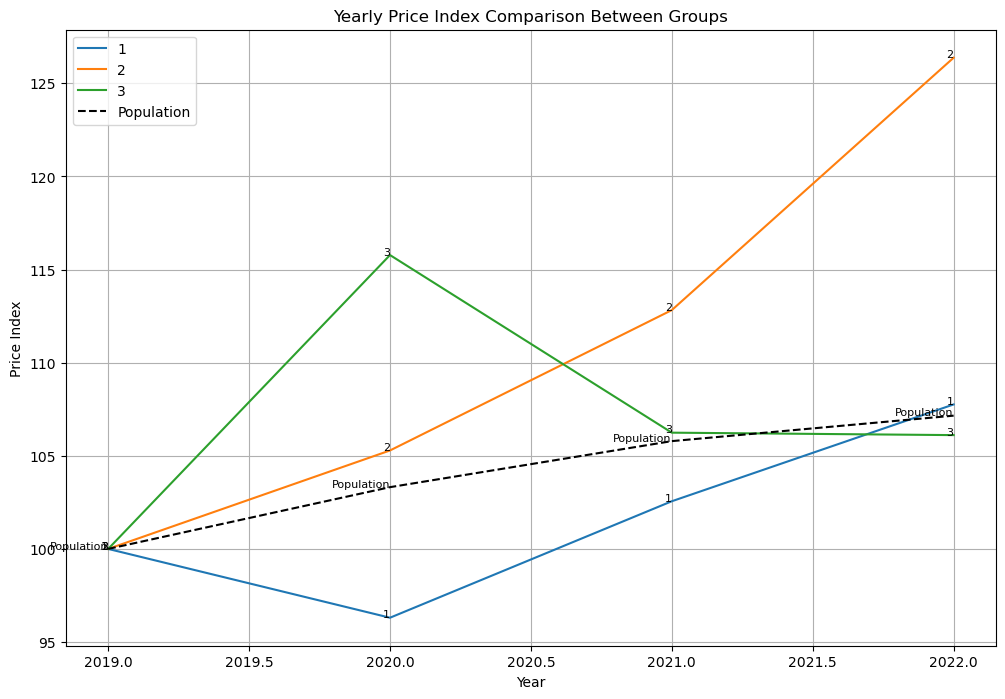

In [13]:
price_index_over_time(ses_analysis, gen_pop_yearly_price_index)

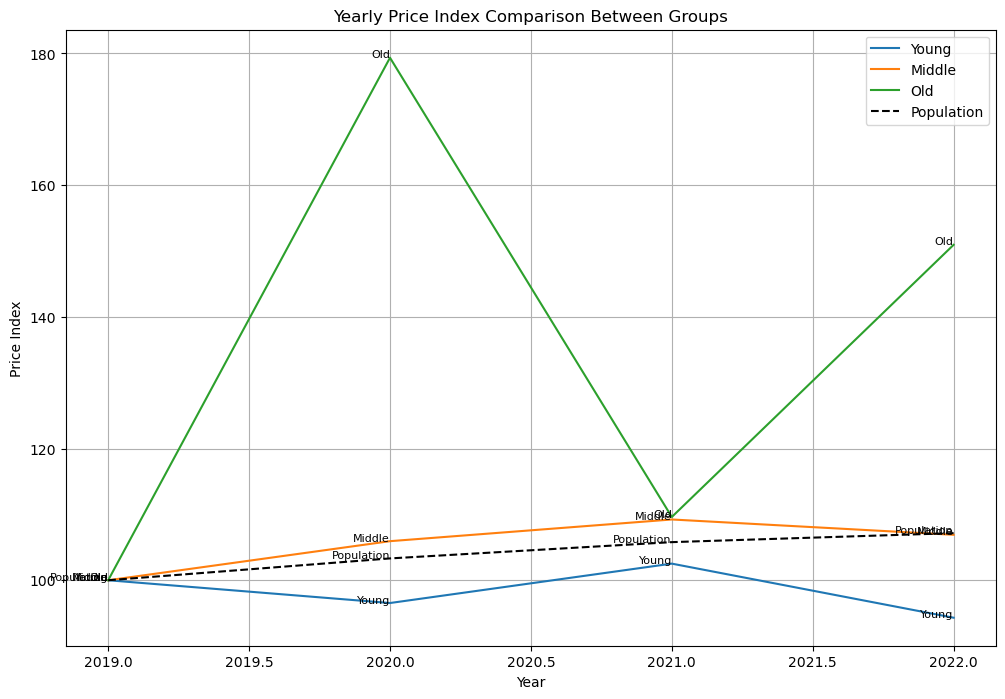

In [14]:
price_index_over_time(age_analysis, gen_pop_yearly_price_index)

### Top Weight Differences

In [15]:
# Define control group
weights_comparison_control = gen_pop[f'combined_{comparison_level}_df'][gen_pop[f'combined_{comparison_level}_df']['Year'] == comparison_year]

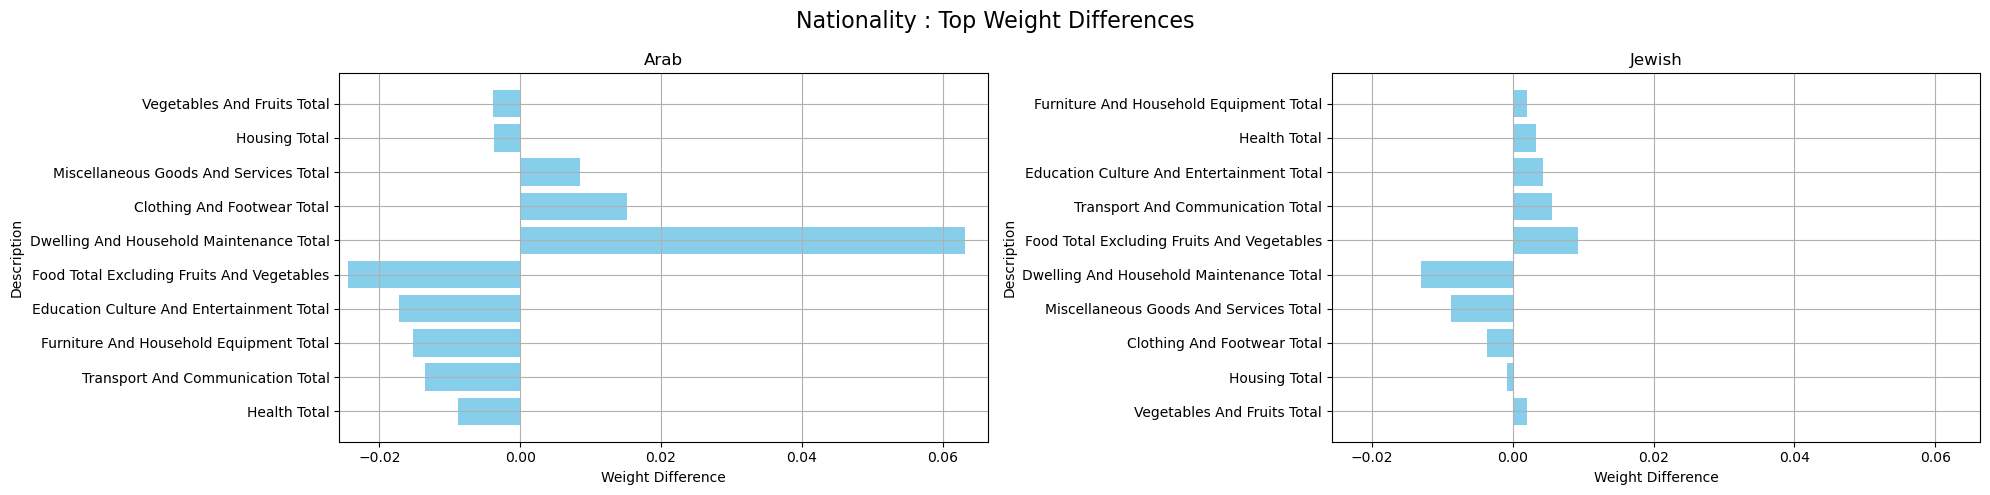

In [16]:
# Top weight differences - nationality groups
nationality_comparison_groups = {}
for group in nationality_analysis:
    nationality_comparison_groups[group] = nationality_analysis[group][f'combined_{comparison_level}_df'][nationality_analysis[group][f'combined_{comparison_level}_df']['Year'] == comparison_year]
top_abs_weight_differences(nationality_comparison_groups, weights_comparison_control, top_n, title = "Nationality")

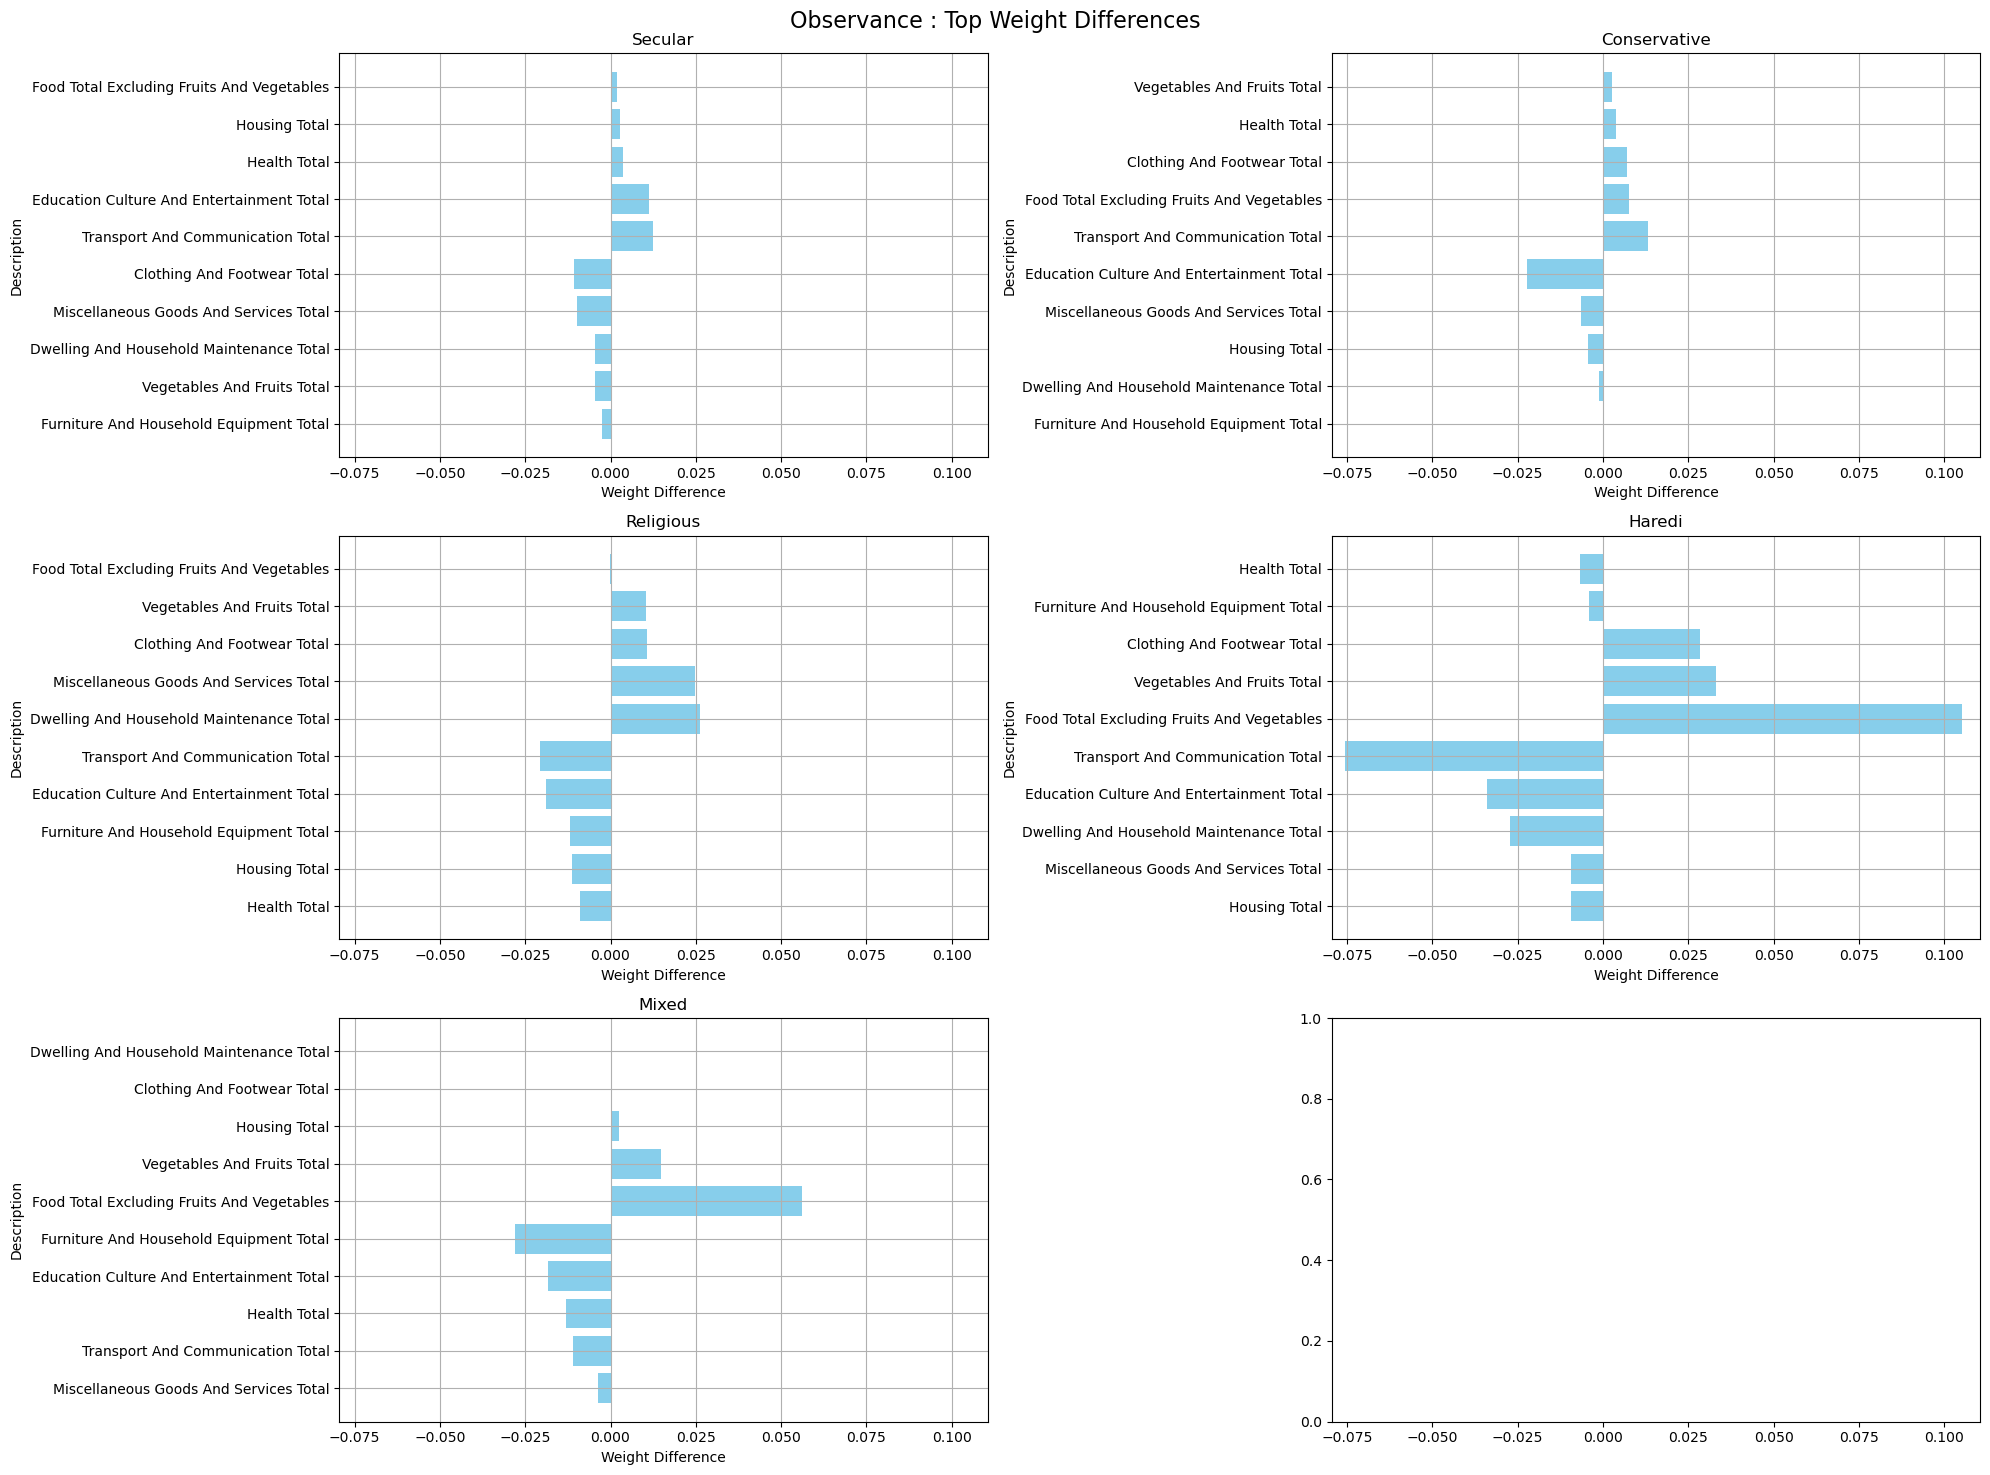

In [17]:
observance_comparison_groups = {}
for group in observance_analysis:
    observance_comparison_groups[group] = observance_analysis[group][f'combined_{comparison_level}_df'][observance_analysis[group][f'combined_{comparison_level}_df']['Year'] == comparison_year]
top_abs_weight_differences(observance_comparison_groups, weights_comparison_control, top_n, title = "Observance")

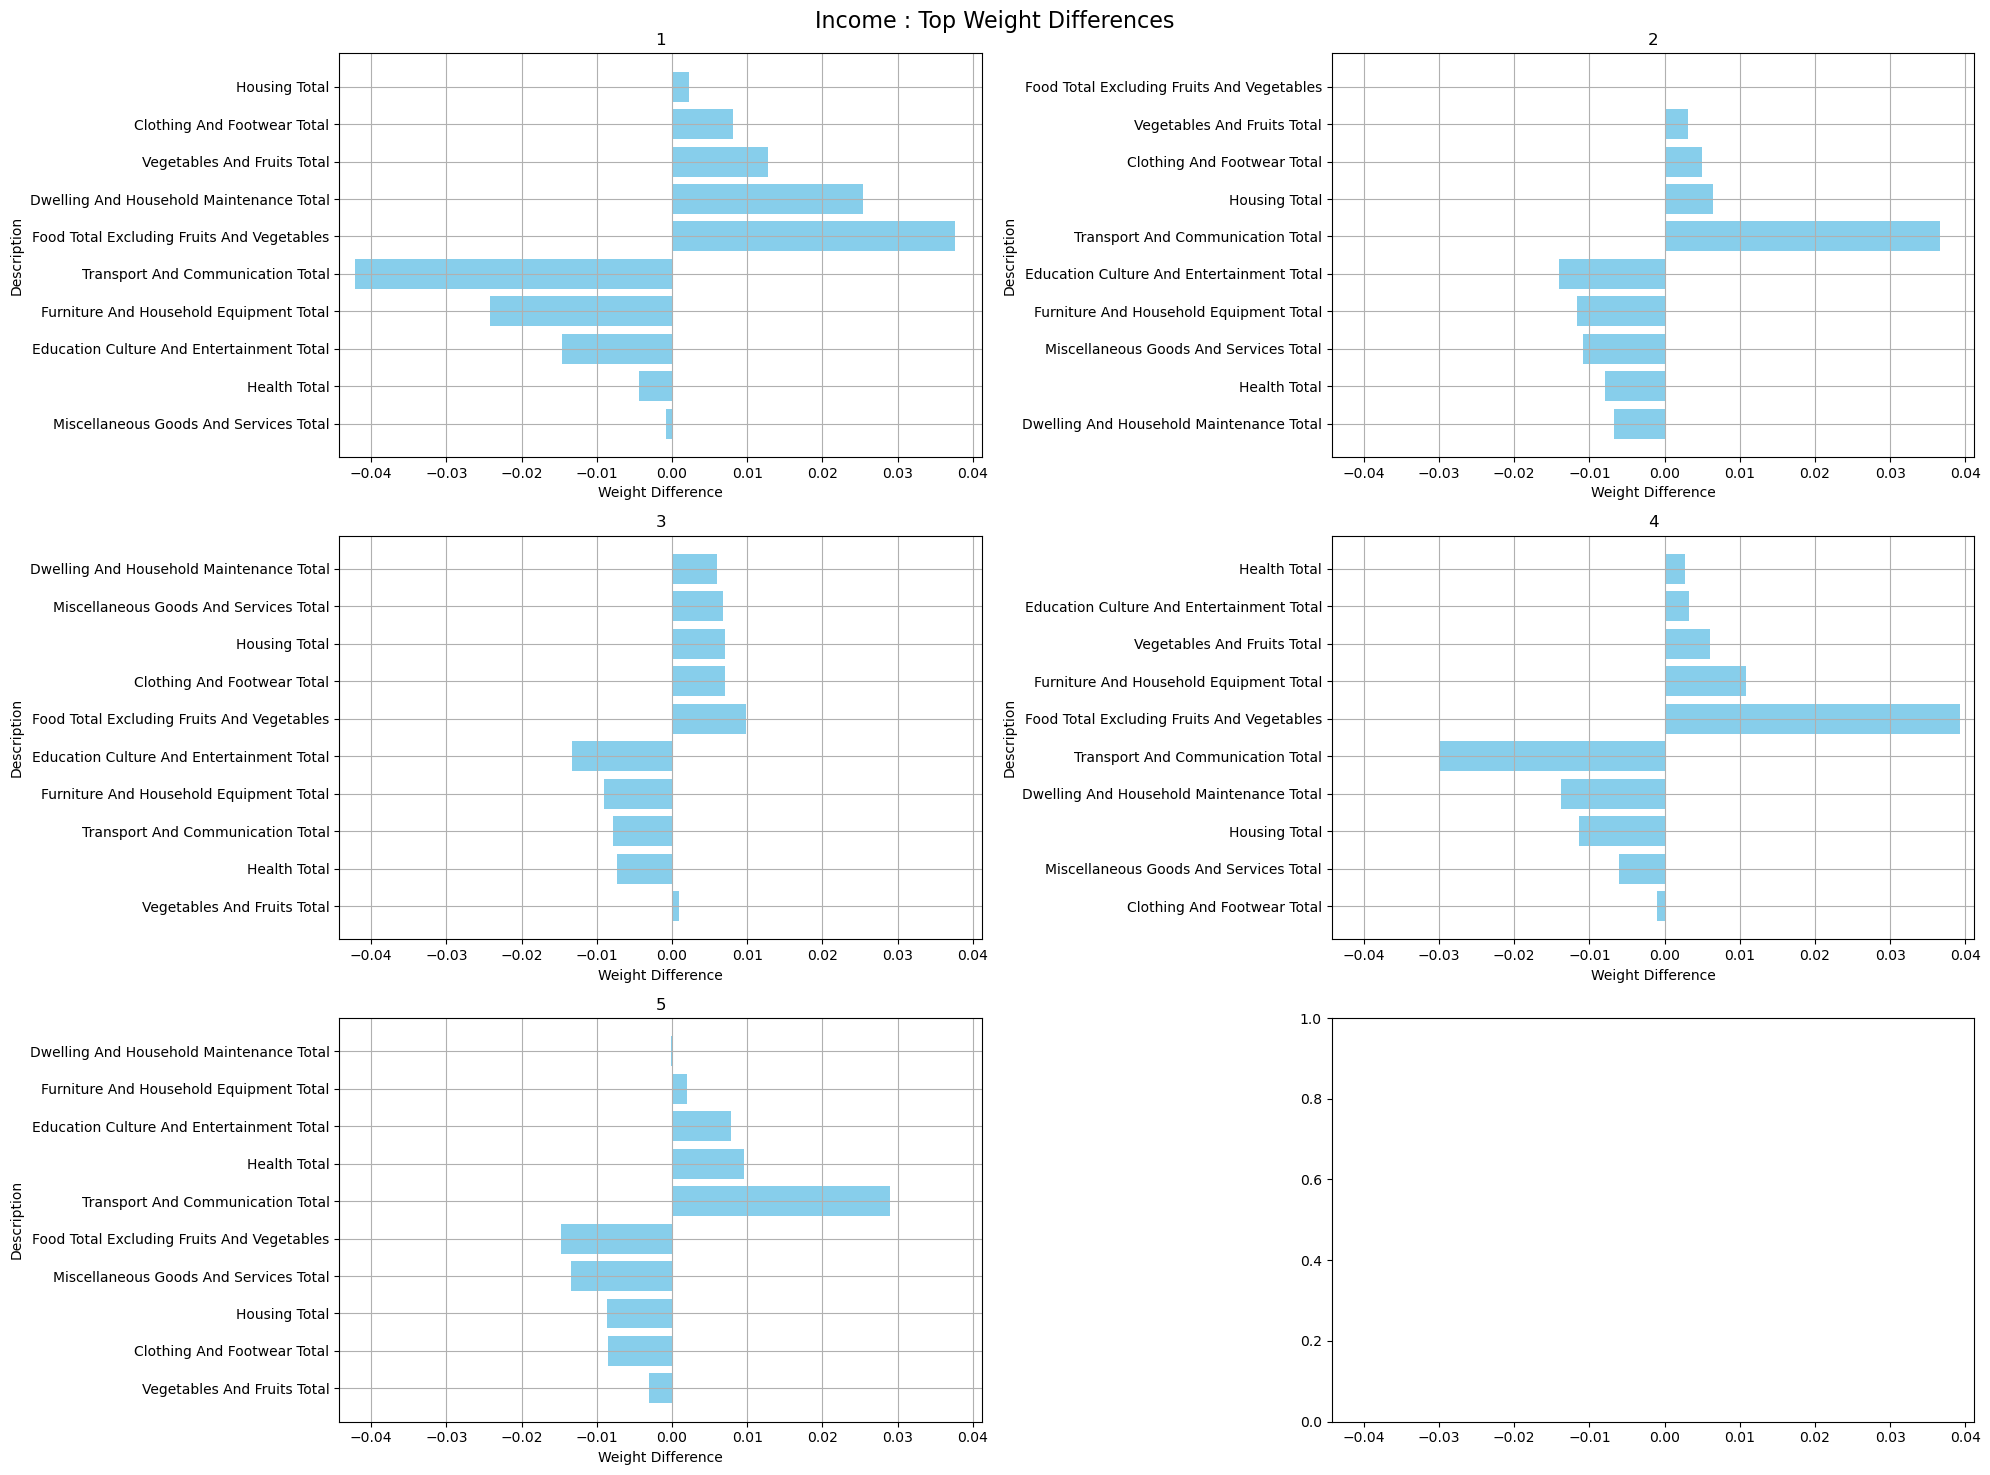

In [18]:
# Top weight differences - income groups
income_comparison_groups = {}
for group in income_analysis:
    income_comparison_groups[group] = income_analysis[group][f'combined_{comparison_level}_df'][income_analysis[group][f'combined_{comparison_level}_df']['Year'] == comparison_year]
top_abs_weight_differences(income_comparison_groups, weights_comparison_control, top_n, title = "Income")

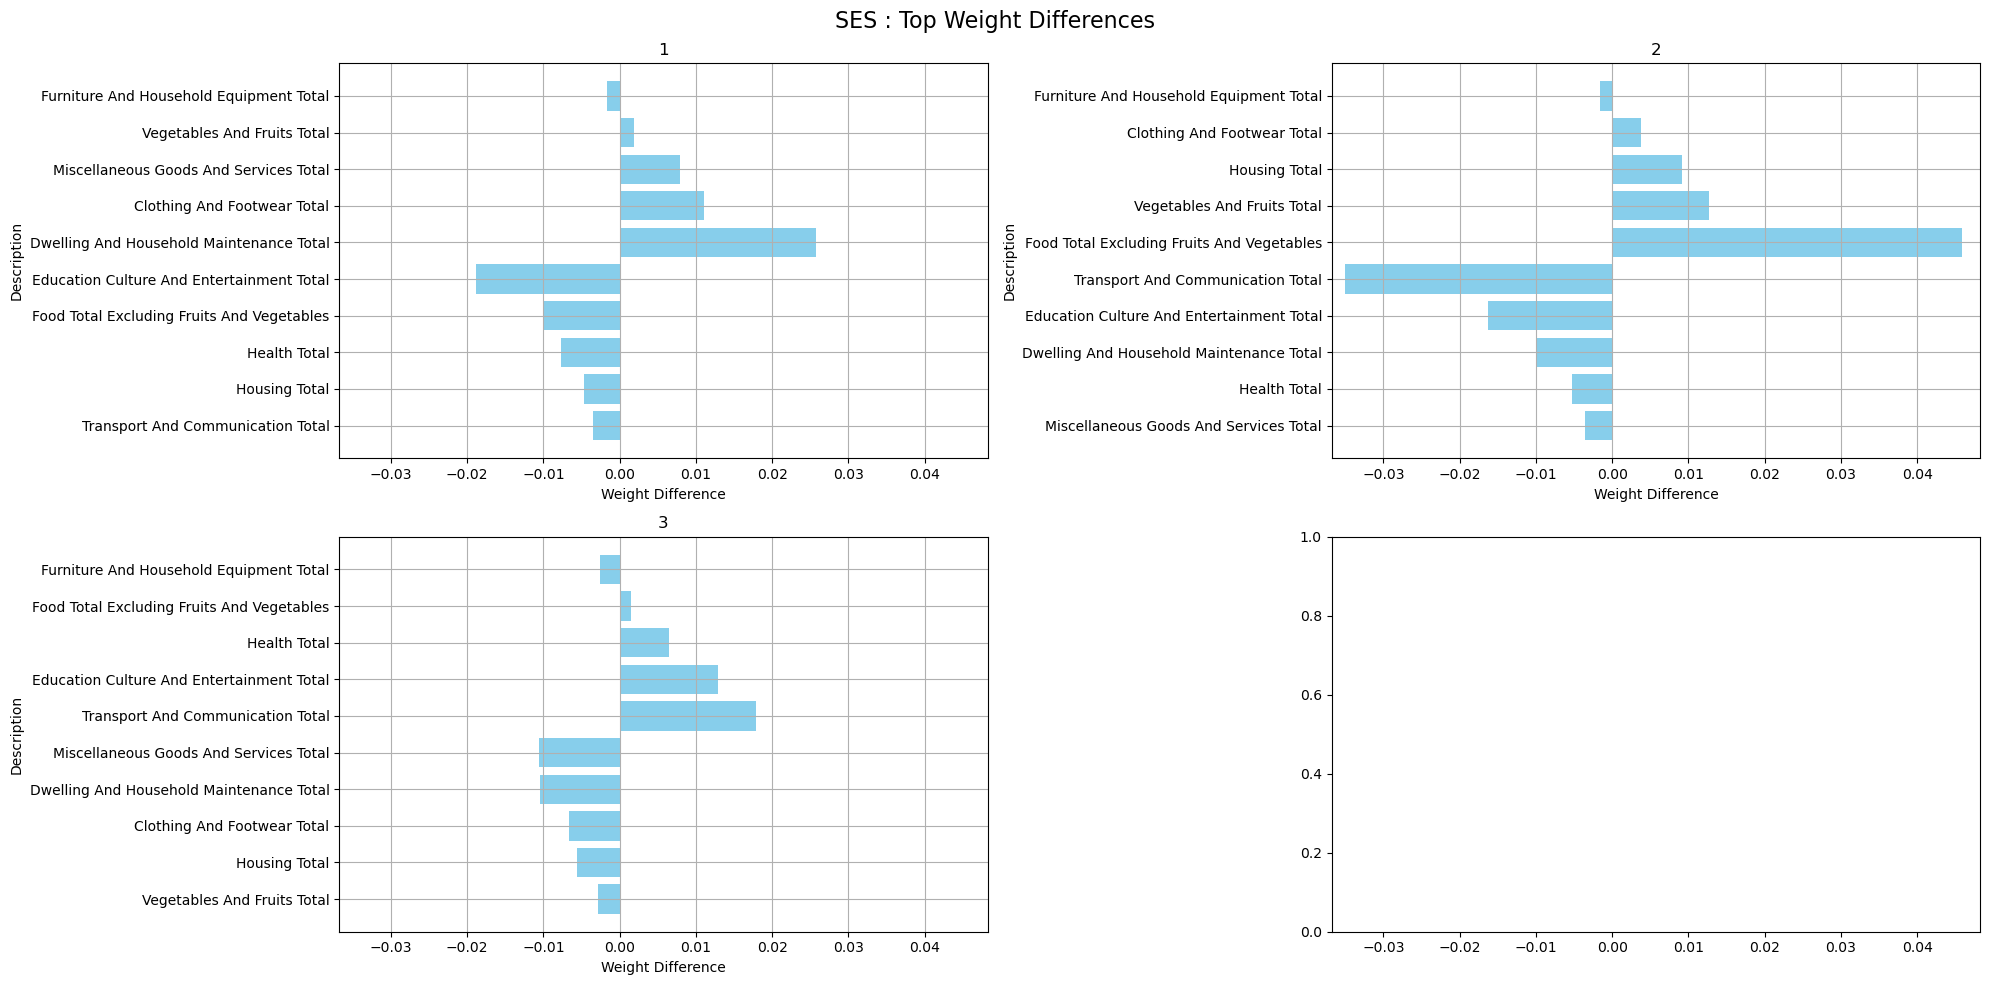

In [19]:
# Top weight differences - SES groups
ses_comparison_groups = {}
for group in ses_analysis:
    ses_comparison_groups[group] = ses_analysis[group][f'combined_{comparison_level}_df'][ses_analysis[group][f'combined_{comparison_level}_df']['Year'] == comparison_year]
top_abs_weight_differences(ses_comparison_groups, weights_comparison_control, top_n, title = "SES")

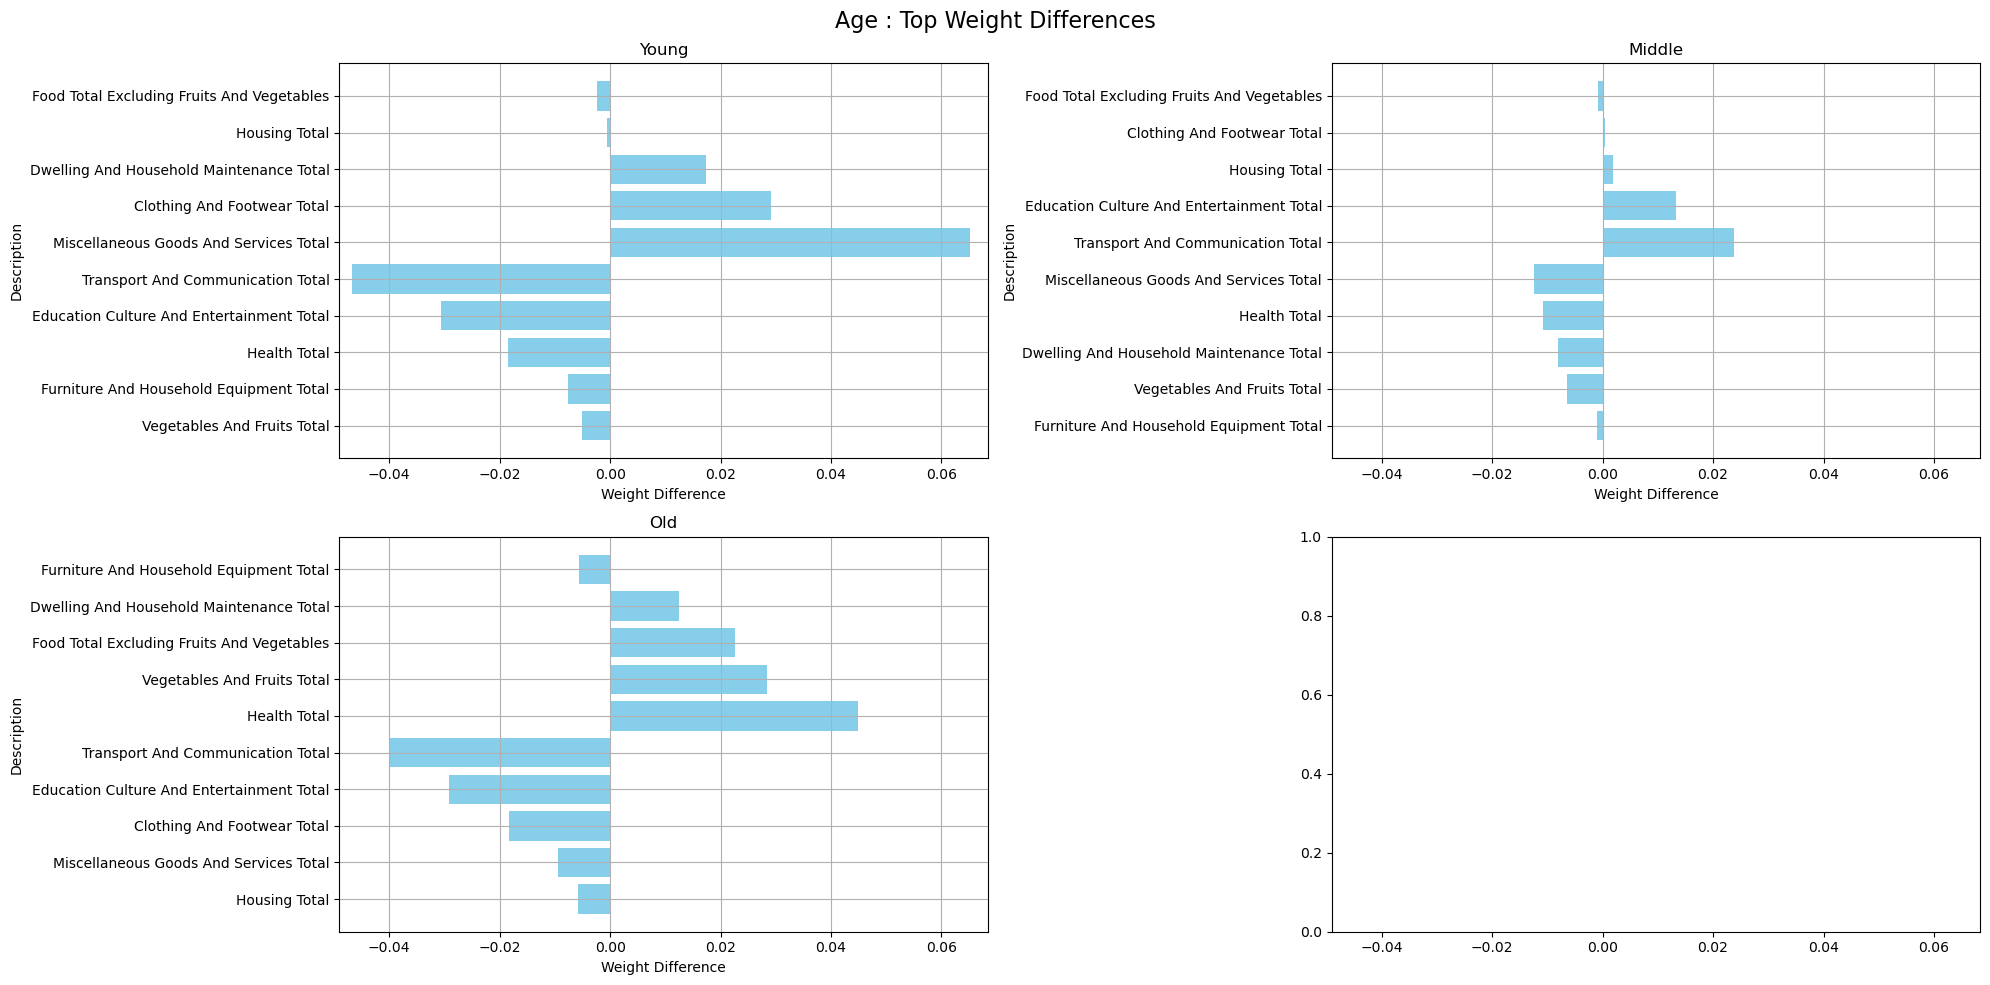

In [20]:
# Top weight differences - age groups
age_comparison_groups = {}
for group in age_analysis:
    age_comparison_groups[group] = age_analysis[group][f'combined_{comparison_level}_df'][age_analysis[group][f'combined_{comparison_level}_df']['Year'] == comparison_year]
top_abs_weight_differences(age_comparison_groups, weights_comparison_control, top_n, title = "Age")

### Top Contributors to CPI Change

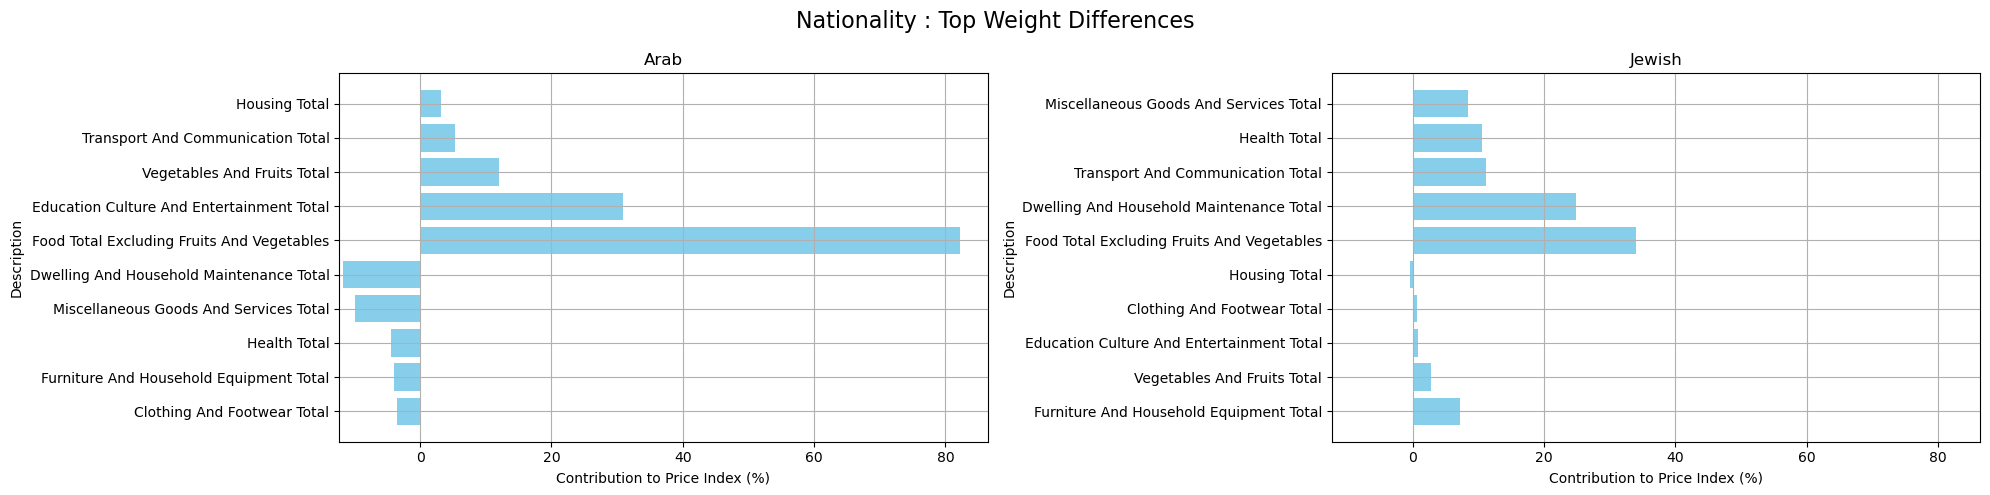

In [21]:
# Top contributors - nationality groups
nationality_yearly_price_indexes = {}
for group in nationality_analysis:
    nationality_yearly_price_indexes[group] = nationality_analysis[group]['yearly_price_index'][comparison_year]
top_price_index_contributors(nationality_comparison_groups, nationality_yearly_price_indexes, top_n, title = "Nationality")

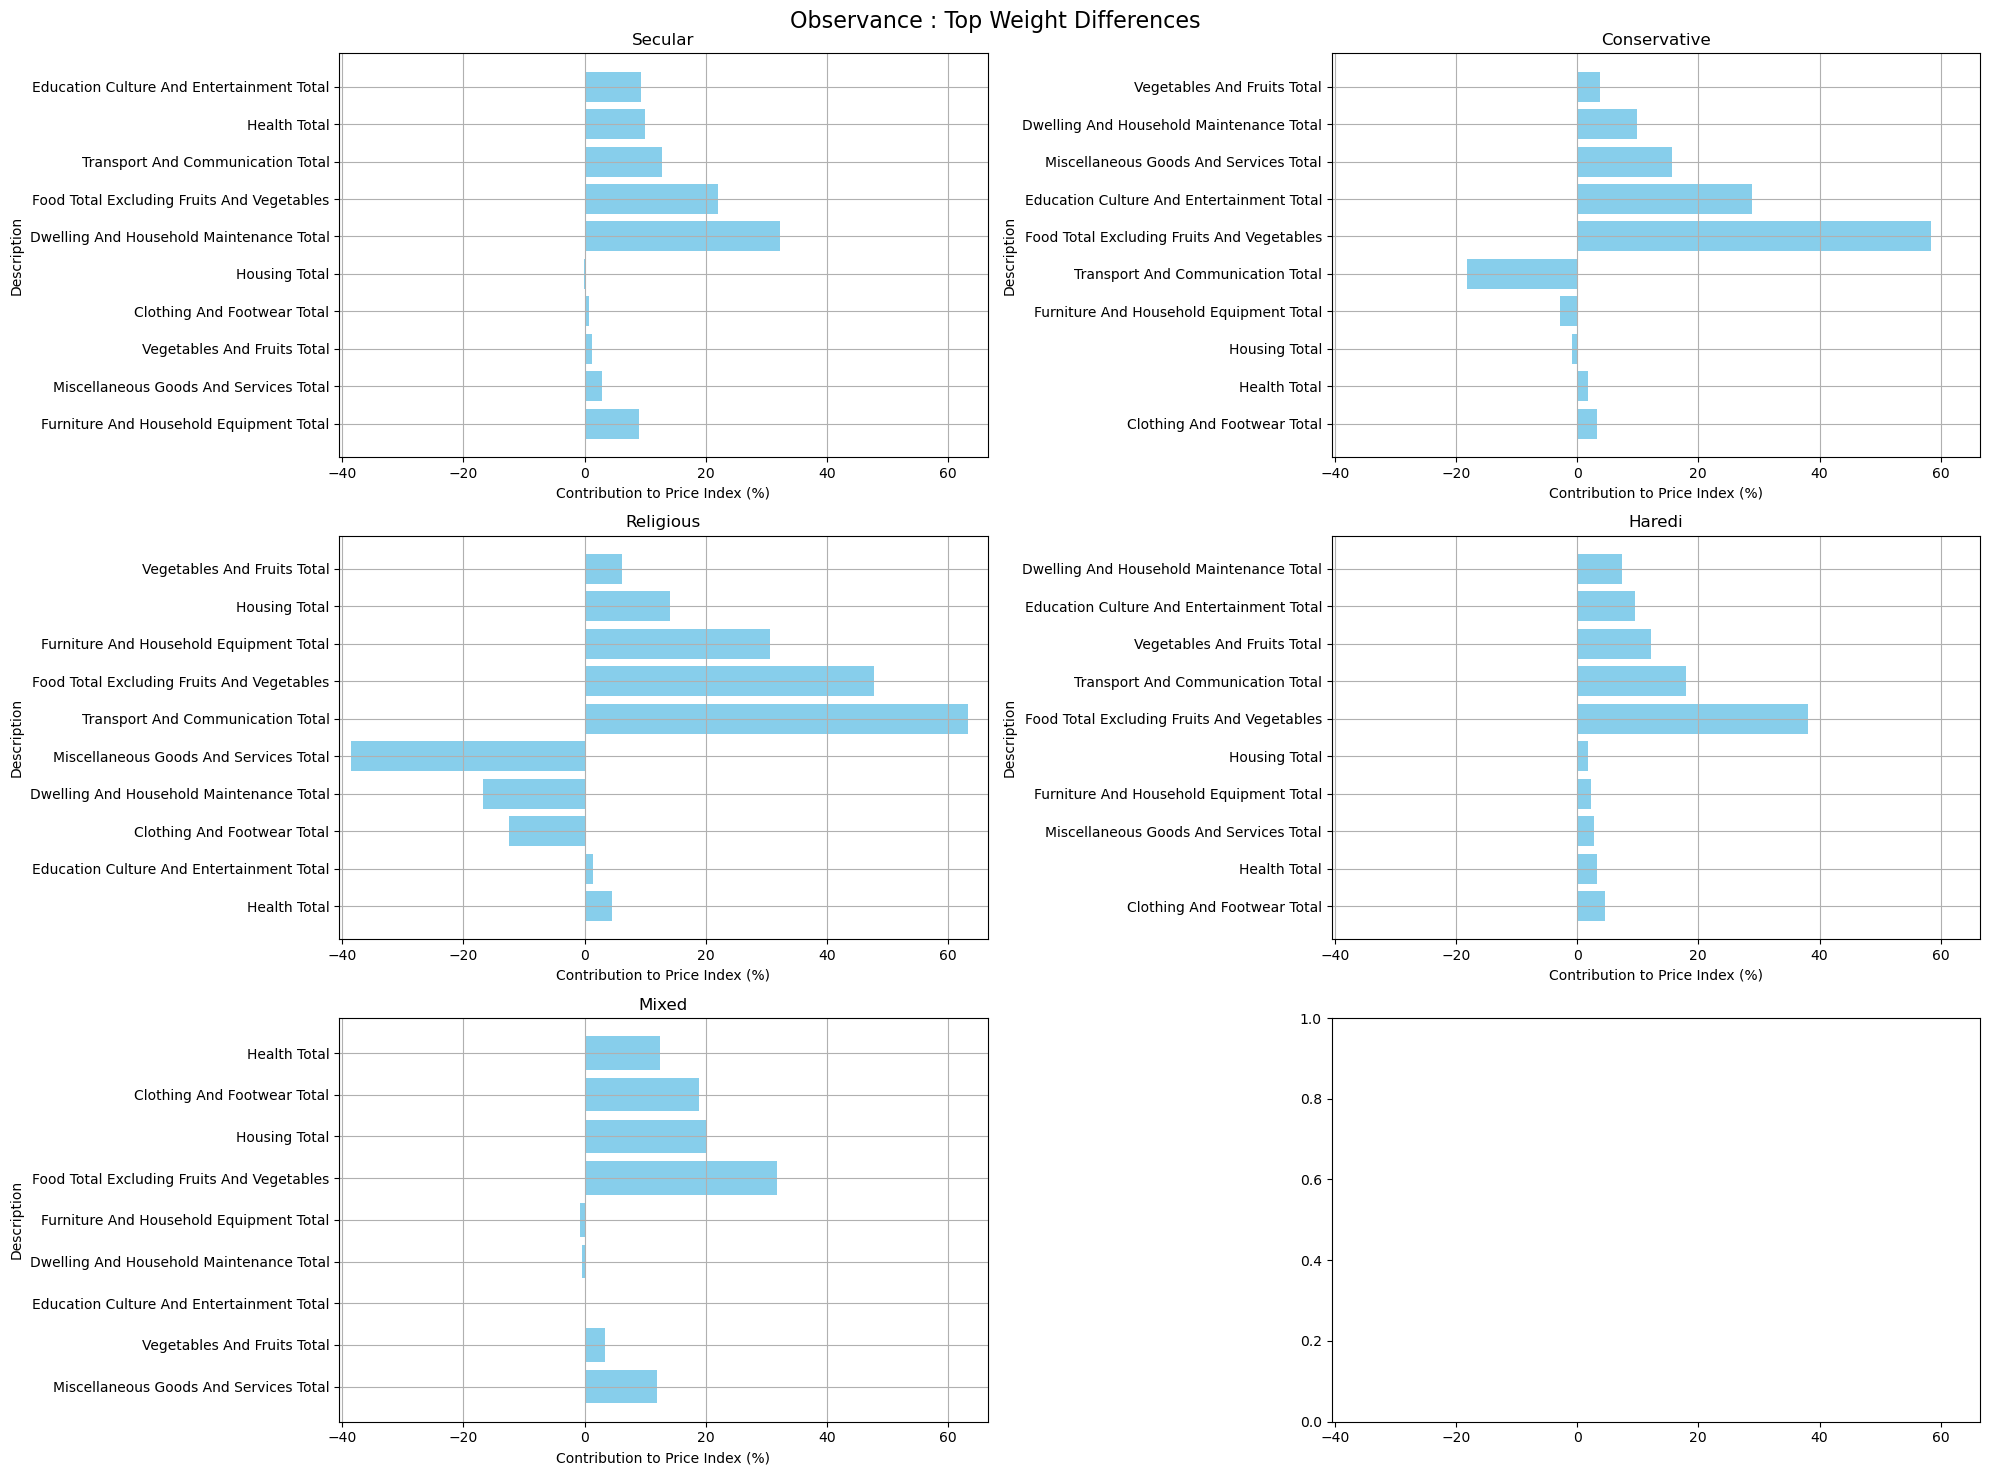

In [22]:
# Top contributors - observance groups
observance_yearly_price_indexes = {}
for group in observance_analysis:
    observance_yearly_price_indexes[group] = observance_analysis[group]['yearly_price_index'][comparison_year]
top_price_index_contributors(observance_comparison_groups, observance_yearly_price_indexes, top_n, title = "Observance")

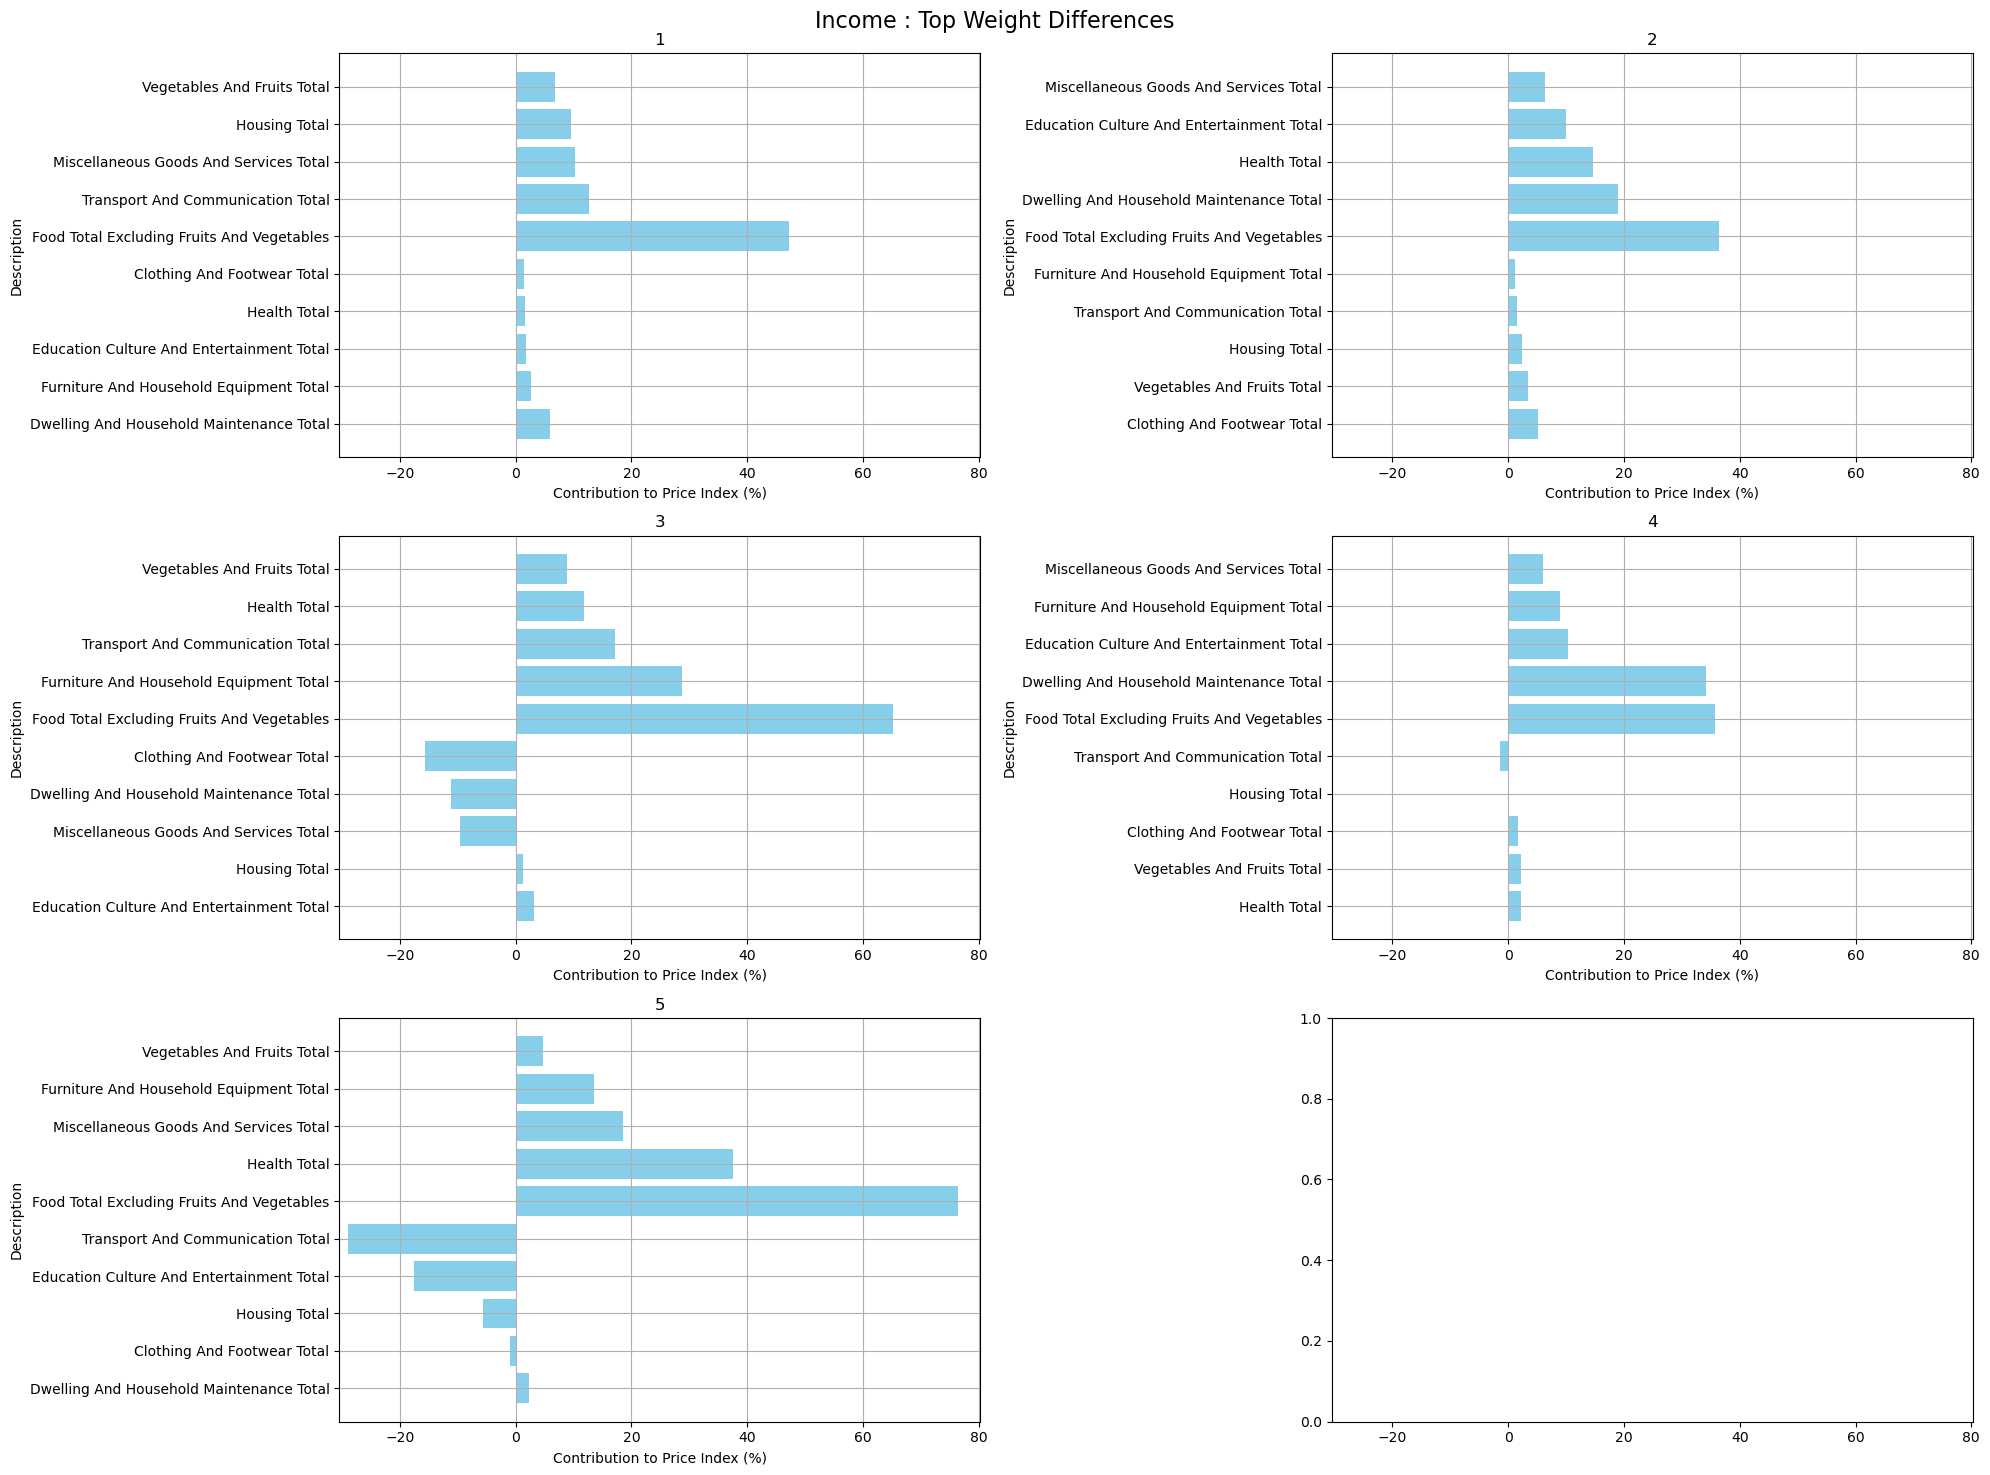

In [23]:
# Top contributors - income groups
income_yearly_price_indexes = {}
for group in income_analysis:
    income_yearly_price_indexes[group] = income_analysis[group]['yearly_price_index'][comparison_year]
top_price_index_contributors(income_comparison_groups, income_yearly_price_indexes, top_n, title = "Income")

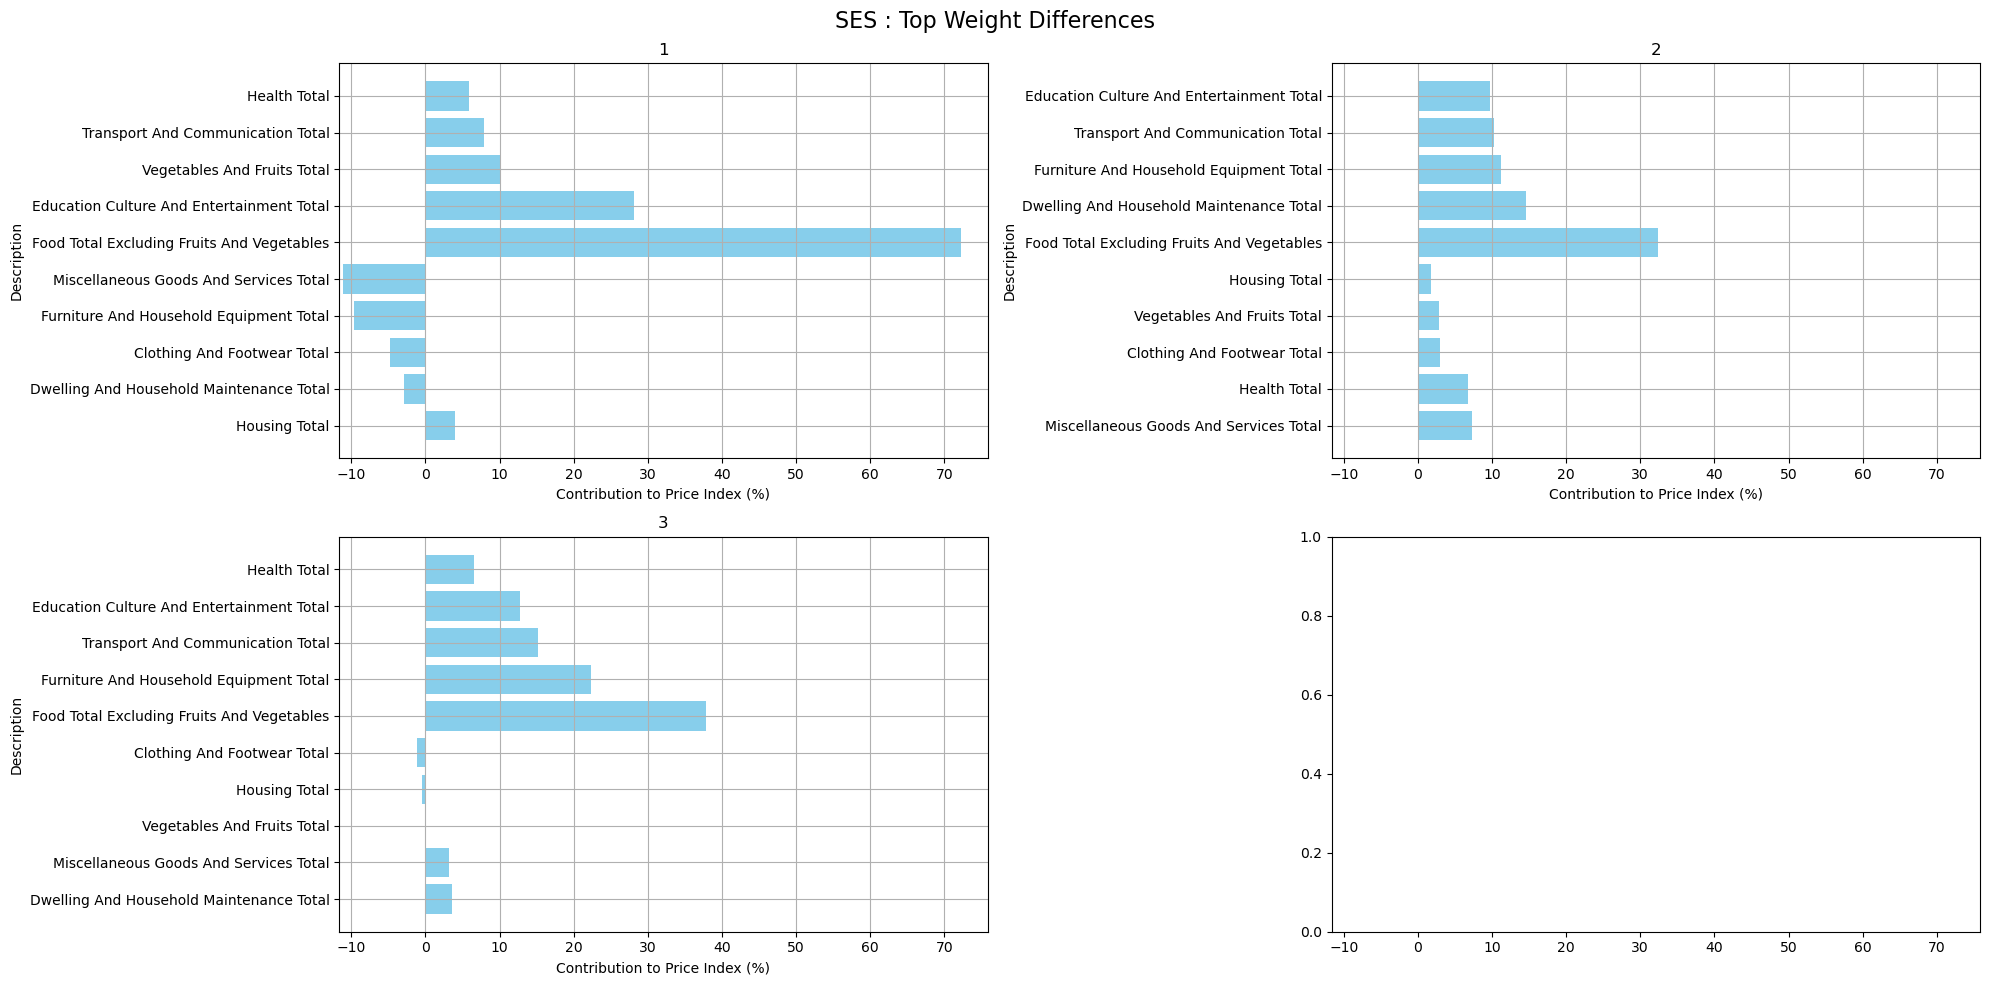

In [24]:
# Top contributors - SES groups
ses_yearly_price_indexes = {}
for group in ses_analysis:
    ses_yearly_price_indexes[group] = ses_analysis[group]['yearly_price_index'][comparison_year]
top_price_index_contributors(ses_comparison_groups, ses_yearly_price_indexes, top_n, title = "SES")

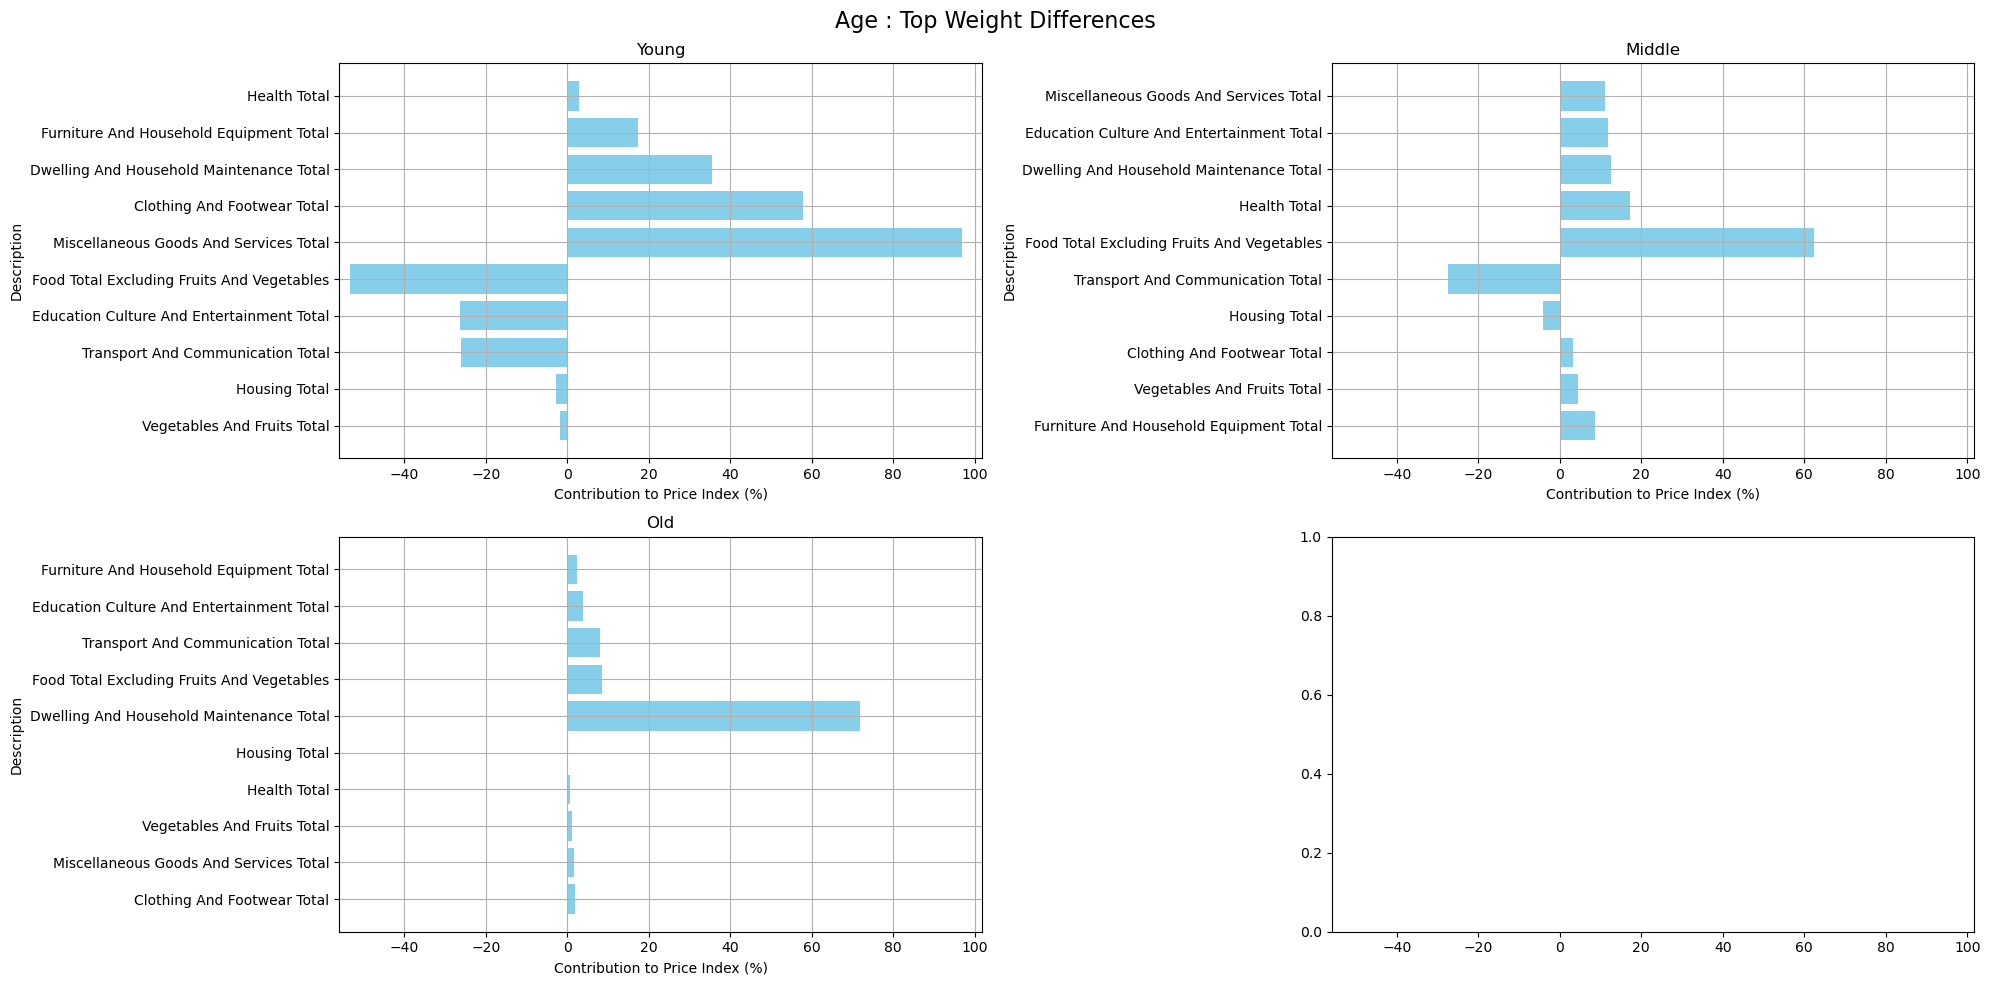

In [25]:
# Top contributors - age groups
age_yearly_price_indexes = {}
for group in age_analysis:
    age_yearly_price_indexes[group] = age_analysis[group]['yearly_price_index'][comparison_year]
top_price_index_contributors(age_comparison_groups, age_yearly_price_indexes, top_n, title = "Age")

In [26]:
# Export to html [--no-input]
!jupyter nbconvert --to html Tri_Group_inflation_comparison.ipynb --output Group_inflation_{comparison_level}_top_{top_n}.html 

[NbConvertApp] WARNING | pattern 'Tri_Group_inflation_comparison.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=